<a href="https://colab.research.google.com/github/xBrymer/TensorFlow-Basics/blob/master/DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:
TRAIN_DIR = '/content/gdrive/My Drive/Kaggle/train'
TEST_DIR = '/content/gdrive/My Drive/Kaggle/test'

In [ ]:
!pip install alive-progress

In [4]:
from tensorflow import keras
import numpy as np
import os
from random import shuffle
from tqdm import tqdm_notebook
import PIL

In [5]:
def label_img(img):
  word_label = img.split('.')[-3]
  if word_label == 'cat': return 0
  elif word_label == 'dog': return 1

In [6]:
def process_labels():
  train_labels = []
  
  for image in tqdm_notebook(os.listdir(TRAIN_DIR)):
    
    if label_img(image) == 0:
      train_labels.append(np.array(0))
    elif label_img(image) == 1:
      train_labels.append(np.array(1))

  np.save('DvC-Training_Labels.npy', train_labels)
  return train_labels


def process_pictures():
  train_images = []
  
  for image in tqdm_notebook(os.listdir(TRAIN_DIR)):
       
    image = keras.preprocessing.image.load_img(
        f'{TRAIN_DIR}/{image}',
        color_mode="grayscale",
        interpolation="nearest",
        target_size=(56, 56)
    )
    image = keras.preprocessing.image.img_to_array(image)
    image = np.array([image])/255
    image.reshape(56, 56, 1)

    train_images.append(image)

  np.save('DvC-Training_Images.npy', train_images)
  return train_images



In [7]:
#TRAINING_LABELS = process_labels()
TRAINING_LABELS = np.load('DvC-Training_Labels.npy')

In [8]:
#TRAINING_IMAGES = process_pictures()
TRAINING_IMAGES = np.load('DvC-Training_Images.npy')

In [9]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [10]:
TRAINING_IMAGES = np.reshape(TRAINING_IMAGES, (25000,56,56,1))

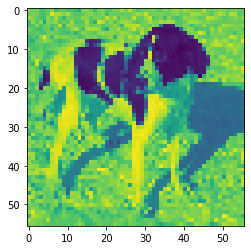

In [22]:
plt.imshow(np.reshape(TRAINING_IMAGES[16123], (56,56)))

In [12]:
TRAINING_LABELS_OH = to_categorical(TRAINING_LABELS)

In [13]:
print(TRAINING_LABELS_OH[16120])

[0. 1.]


In [14]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import PIL

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(56,56,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))


In [59]:

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [60]:
model.fit(TRAINING_IMAGES, TRAINING_LABELS_OH, epochs = 10)

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.7109 - accuracy: 0.6698
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4840 - accuracy: 0.7713
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4329 - accuracy: 0.8032
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4040 - accuracy: 0.8197
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3833 - accuracy: 0.8292
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3583 - accuracy: 0.8426
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3423 - accuracy: 0.8529
Epoch 8/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3305 - accuracy: 0.8575
Epoch 9/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3176 - accuracy: 0.8634
Epoch 10/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3067 - accuracy: 0.8698

In [61]:
model.save('DvC-Model-v1.0.h5')

In [33]:
#PREPROCESS TEST IMAGES
def process_test_pictures(limit):
  test_images = []
  
  for image in tqdm_notebook(os.listdir(TEST_DIR)[:limit]):
       
    image = keras.preprocessing.image.load_img(
        f'{TEST_DIR}/{image}',
        color_mode="grayscale",
        interpolation="nearest",
        target_size=(56, 56)
    )
    image = keras.preprocessing.image.img_to_array(image)
    image = np.array([image])/255
    image.reshape(56, 56, 1)

    test_images.append(image)

  np.save('DvC-Test_Images.npy', test_images)
  return test_images


In [34]:
TEST_IMAGES = process_test_pictures(50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [38]:
TEST_IMAGES = np.reshape(TEST_IMAGES, (50, 56,56,1))

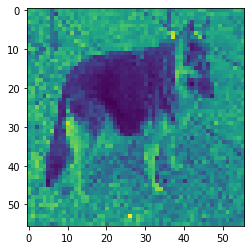

In [62]:
plt.imshow(np.reshape(TEST_IMAGES[5], (56,56)))

In [43]:
class_names = ['cat', 'dog']

In [63]:
probability_model = keras.Sequential([
  model, keras.layers.Softmax()                   
])

In [64]:
predictions = probability_model.predict(TEST_IMAGES)

In [65]:
def predict(index):
  plt.imshow(np.reshape(TEST_IMAGES[index], (56,56)))
  class_prediction = class_names[np.argmax(predictions[index])]

  print(f'I predict that this is a {class_prediction}')
  return 


I predict that this is a cat


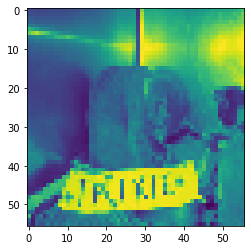

In [73]:
predict(9)

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 54, 54, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       